## Install Libraries

First I want to install the python packages for this project and then read in the datasets with Pandas.

In [1]:
# import libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns




In [2]:
# load in data sources

sightings = pd.read_csv('data/ufo_location_shape.csv')
climate = pd.read_csv('data/USA_HistoricalWeather_State.csv')



## Clean and Combine the Data

Next I want to clean and combine the two dataframes.  The first step in doing this is to check the head, shape, and info of each dataframe.

In [3]:
# print the head of each data frame 

sightings.head(5)


,Event.Date,Shape,Location,State,Country,Source,USA,Unnamed: 7
0,6/18/2016,Boomerang/V-Shaped,South Barrington,IL,USA,NUFORC,1,NaN
1,6/17/2016,Boomerang/V-Shaped,Kuna,ID,USA,NUFORC,1,NaN
2,5/30/2016,Boomerang/V-Shaped,Lake Stevens,WA,USA,NUFORC,1,NaN
3,5/27/2016,Boomerang/V-Shaped,Gerber,CA,USA,NUFORC,1,NaN
4,5/24/2016,Boomerang/V-Shaped,Camdenton,MO,USA,NUFORC,1,NaN


In [4]:
climate.head(5)

,Unnamed: 0,state,avg_hum_spr,avg_hum_sum,avg_hum_fall,avg_hum_wint,avg_temp_spr,avg_temp_sum,avg_temp_fall,avg_temp_wint,avg_precip_spr,avg_precip_sum,avg_precip_fall,avg_precip_wint,avg_pressure_spr,avg_pressure_sum,avg_pressure_fall,avg_pressure_wint
0,0,Alabama,73.021978,72.582418,75.326087,75.739130,18.076923,27.604396,30.793478,20.989130,1.324176,3.756044,6.307609,2.841304,1021.978022,1016.000000,1016.271739,1018.380435
1,1,Alaska,67.769231,72.439560,78.293478,75.163043,28.197802,30.000000,29.641304,27.739130,0.081319,2.485714,4.276087,0.751087,1014.450549,1012.296703,1012.597826,1013.260870
2,2,Arizona,82.164835,77.153846,79.891304,81.673913,25.582418,29.054945,28.782609,27.021739,2.626374,2.190110,1.850000,3.127174,1016.362637,1013.098901,1013.945652,1014.097826
3,3,Arkansas,58.307692,68.109890,68.304348,67.554348,10.824176,26.076923,30.902174,12.576087,0.231868,1.501099,1.282609,0.541304,1021.076923,1012.945055,1015.217391,1019.086957
4,4,California,42.681319,34.846154,24.760870,39.195652,15.538462,27.318681,35.010870,18.010870,0.228571,0.002198,0.014130,0.129348,1018.505495,1012.505495,1012.206522,1017.293478


In [5]:
# print the shape of each dataframe

sightings.shape

(3646, 8)

In [6]:
climate.shape

(50, 18)

In [7]:
# print info of each dataframe

sightings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3646 entries, 0 to 3645
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Event.Date  3646 non-null   object 
 1   Shape       3646 non-null   object 
 2   Location    3635 non-null   object 
 3   State       3524 non-null   object 
 4   Country     3641 non-null   object 
 5   Source      3646 non-null   object 
 6   USA         3646 non-null   object 
 7   Unnamed: 7  11 non-null     float64
dtypes: float64(1), object(7)
memory usage: 228.0+ KB


In [8]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         50 non-null     int64  
 1   state              50 non-null     object 
 2   avg_hum_spr        50 non-null     float64
 3   avg_hum_sum        50 non-null     float64
 4   avg_hum_fall       50 non-null     float64
 5   avg_hum_wint       50 non-null     float64
 6   avg_temp_spr       50 non-null     float64
 7   avg_temp_sum       50 non-null     float64
 8   avg_temp_fall      50 non-null     float64
 9   avg_temp_wint      50 non-null     float64
 10  avg_precip_spr     50 non-null     float64
 11  avg_precip_sum     50 non-null     float64
 12  avg_precip_fall    50 non-null     float64
 13  avg_precip_wint    50 non-null     float64
 14  avg_pressure_spr   50 non-null     float64
 15  avg_pressure_sum   50 non-null     float64
 16  avg_pressure_fall  50 non-nu

Next I want to remove unneeded columns and organize the columns in ascending order. I will do this with pandas.drop and pandas.concat.

In [9]:
# use .drop to remove columns that won't be used in sightings dataframe

ufos = sightings.drop(['Event.Date', 'Shape', 'Source', 'Unnamed: 7', 'Country', 'USA', 'Location' ], axis=1)
ufos.head(5)

,State
0,IL
1,ID
2,WA
3,CA
4,MO


I want to use Pandas to count how many sightings occured in each State and create a new column with the results.

In [10]:
# group the State column

ufo_1 = ufos.groupby('State').size().sort_values(ascending=False).reset_index(name='Size')
ufo_1.head(15)

,State,Size
0,CA,357
1,FL,266
2,AZ,174
3,WA,161
4,NY,144
5,NC,131
6,PA,125
7,CO,124
8,IL,111
9,OR,103


In [11]:
# use pd.drop to remove unused columns from climate dataframe

temperature = climate.drop(climate.columns[[0,2,3,4,5,10,11,12,13,14,15,16,17]], axis=1)
temperature.head(5)



,state,avg_temp_spr,avg_temp_sum,avg_temp_fall,avg_temp_wint
0,Alabama,18.076923,27.604396,30.793478,20.989130
1,Alaska,28.197802,30.000000,29.641304,27.739130
2,Arizona,25.582418,29.054945,28.782609,27.021739
3,Arkansas,10.824176,26.076923,30.902174,12.576087
4,California,15.538462,27.318681,35.010870,18.010870


In [12]:
# join the two datframes

joined_data = pd.concat([ufo_1, temperature], axis=1, join="inner")
joined_data.head(25)





,State,Size,state,avg_temp_spr,avg_temp_sum,avg_temp_fall,avg_temp_wint
0,CA,357,Alabama,18.076923,27.604396,30.793478,20.989130
1,FL,266,Alaska,28.197802,30.000000,29.641304,27.739130
2,AZ,174,Arizona,25.582418,29.054945,28.782609,27.021739
3,WA,161,Arkansas,10.824176,26.076923,30.902174,12.576087
4,NY,144,California,15.538462,27.318681,35.010870,18.010870
5,NC,131,Colorado,6.494505,19.714286,23.967391,6.619565
6,PA,125,Connecticut,3.934066,20.010989,27.021739,8.500000
7,CO,124,Delaware,3.967033,21.934066,26.510870,8.967391
8,IL,111,Florida,24.604396,22.670330,23.380435,23.065217
9,OR,103,Georgia,9.230769,23.000000,28.934783,12.021739


After joining the dataframes I would still like to do some extra cleaning.  I'd like to get a total average column for the temperature of each state and create a new column.  I can do this using pandas.loc.mean

In [13]:
# calculate total avg State Temperature

ufo = joined_data.assign(avg=joined_data.loc[:, [ 'avg_temp_spr', 'avg_temp_sum', 'avg_temp_fall', 'avg_temp_wint']].mean(axis=1))
ufo.head(10)

,State,Size,state,avg_temp_spr,avg_temp_sum,avg_temp_fall,avg_temp_wint,avg
0,CA,357,Alabama,18.076923,27.604396,30.793478,20.989130,24.365982
1,FL,266,Alaska,28.197802,30.000000,29.641304,27.739130,28.894559
2,AZ,174,Arizona,25.582418,29.054945,28.782609,27.021739,27.610428
3,WA,161,Arkansas,10.824176,26.076923,30.902174,12.576087,20.094840
4,NY,144,California,15.538462,27.318681,35.010870,18.010870,23.969720
5,NC,131,Colorado,6.494505,19.714286,23.967391,6.619565,14.198937
6,PA,125,Connecticut,3.934066,20.010989,27.021739,8.500000,14.866699
7,CO,124,Delaware,3.967033,21.934066,26.510870,8.967391,15.344840
8,IL,111,Florida,24.604396,22.670330,23.380435,23.065217,23.430094
9,OR,103,Georgia,9.230769,23.000000,28.934783,12.021739,18.296823


In [18]:
# rename the Columns

column_names = ['State sighting', 'Number_of_Sightings', 'State Temperature', 'Spring_temp', 'Summer_temp', 'Fall_temp', 'Winter_temp', 'Total_avg_Temp(Celsius)' ]
ufo.columns = column_names
ufo.head()

,State sighting,Number_of_Sightings,State Temperature,Spring_temp,Summer_temp,Fall_temp,Winter_temp,Total_avg_Temp(Celsius)
0,CA,357,Alabama,18.076923,27.604396,30.793478,20.989130,24.365982
1,FL,266,Alaska,28.197802,30.000000,29.641304,27.739130,28.894559
2,AZ,174,Arizona,25.582418,29.054945,28.782609,27.021739,27.610428
3,WA,161,Arkansas,10.824176,26.076923,30.902174,12.576087,20.094840
4,NY,144,California,15.538462,27.318681,35.010870,18.010870,23.969720


I would also like to convert the original data sources into tables and do an SQL join to see if this makes the analysis easier to read and underastand

In [ ]:
# create tables out of the data sources



In [21]:
ufo.dropna(inplace=True)

## Visualizatons

I am going to use the Seaborn library to plot visualizatons for the joint data.  I want to answer the question is there any relationship between ufo sightings and the average temperature of a specific location?

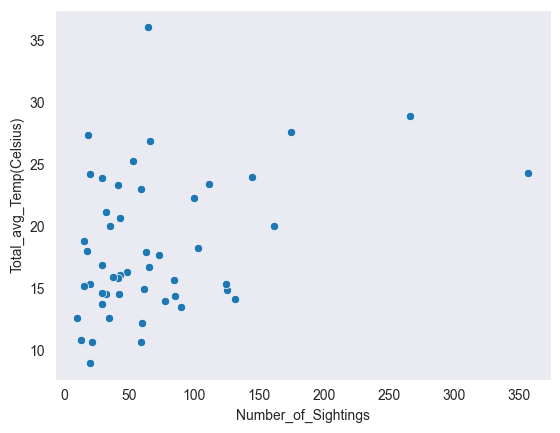

In [47]:
# create a scatter plot that compares sightings to total average temp.


sns.scatterplot(x='Number_of_Sightings', y='Total_avg_Temp(Celsius)', data=ufo);

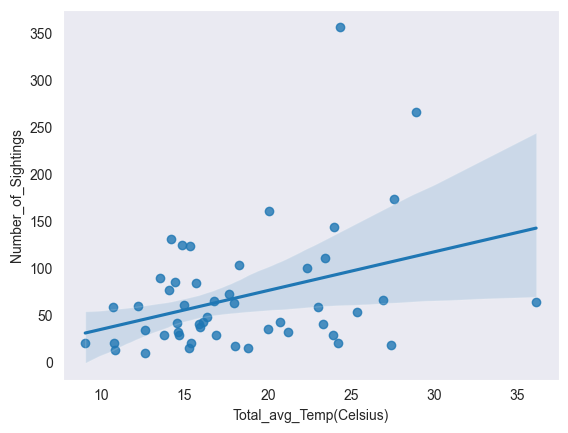

In [50]:
# create a regplot that compares Number_of_Sightings with Total_avg_Temp

sns.regplot( x='Total_avg_Temp(Celsius)', y='Number_of_Sightings', data=ufo);

<Axes: xlabel='Total_avg_Temp(Celsius)', ylabel='Number_of_Sightings'>

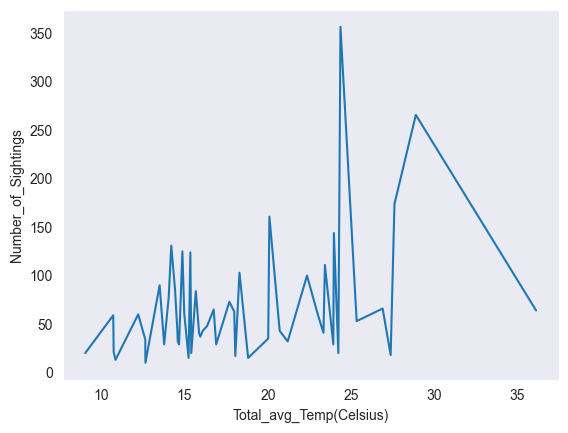

In [59]:
# create a lineplot with seaborn that compares Number_of_Sightings with Total_avg_Temp

sns.lineplot(y= 'Number_of_Sightings', x= 'Total_avg_Temp(Celsius)', data=ufo)

